In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
# from tensorflow.keras.datasets import mnist
from keras import Sequential
from keras.layers import Input, Flatten, Dense

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2" #to hide INFO and WARNING

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(f"training data: {x_train.shape} and testing data: {x_test.shape}")
print(f"testing data: {y_train.shape} and testing data: {y_test.shape}")

training data: (60000, 28, 28) and testing data: (10000, 28, 28)
testing data: (60000,) and testing data: (10000,)


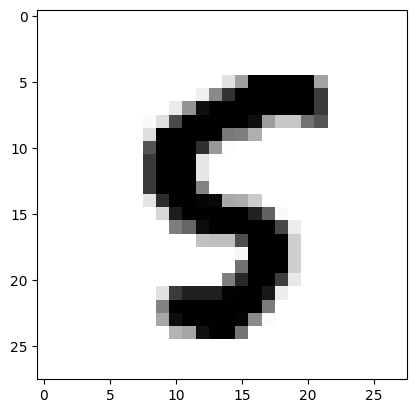

In [5]:
rand_data=x_train[np.random.randint(0,60001)]
plt.imshow(rand_data, cmap="binary") #imshow: It takes a NumPy array or an array-like object as input and renders it as a raster image

In [6]:
#Now Normalize pixel values of x_train, and x_test: 0-255 -> 0-1
x_train=x_train/255
x_test=x_test/255

**Model 1:** Has 2 hidden layers, each with 16 nodes, and uses the sigmoid function as activation.

In [7]:
model1=Sequential()
model1.add(Input(shape=(28, 28))) # i/p layer
model1.add(Flatten()) # i/p layer
model1.add(Dense(16,activation="sigmoid"))
model1.add(Dense(16,activation="sigmoid"))
model1.add(Dense(10,activation="softmax"))


I0000 00:00:1771049319.814345      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15511 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


**Model 2:** Has 2 hidden layers, each with 16 nodes, and uses the ReLU function as activation.

In [8]:
model2=Sequential()
model2.add(Input(shape=(28, 28)))
model2.add(Flatten())
model2.add(Dense(16,activation="relu"))
model2.add(Dense(16,activation="relu"))
model2.add(Dense(10,activation="softmax"))

**Model 3:** Has 2 hidden layers, each with 64 nodes, and uses the sigmoid function as activation.

In [9]:
model3=Sequential()
model3.add(Input(shape=(28, 28)))
model3.add(Flatten())
model3.add(Dense(64,activation="sigmoid"))
model3.add(Dense(64,activation="sigmoid"))
model3.add(Dense(10,activation="softmax"))

**Model 3:** Has 2 hidden layers, each with 64 nodes, and uses the ReLU function as activation.

In [11]:
model4=Sequential()
model4.add(Input(shape=(28, 28)))
model4.add(Flatten())
model4.add(Dense(64,activation="relu"))
model4.add(Dense(64,activation="relu"))
model4.add(Dense(10,activation="softmax"))

In [12]:
model1.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model2.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model3.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model4.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [13]:
hist_model1=model1.fit(x_train,y_train,batch_size=32,epochs=15,verbose=1,validation_split=0.2)

Epoch 1/15


I0000 00:00:1771049457.594358     129 service.cc:152] XLA service 0x7e0f7c004e70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1771049457.594398     129 service.cc:160]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1771049457.852065     129 cuda_dnn.cc:529] Loaded cuDNN version 91002


  69/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1540 - loss: 2.3467

I0000 00:00:1771049458.628086     129 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5319 - loss: 1.7623 - val_accuracy: 0.8777 - val_loss: 0.6764
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8801 - loss: 0.5882 - val_accuracy: 0.9077 - val_loss: 0.3761
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9081 - loss: 0.3602 - val_accuracy: 0.9212 - val_loss: 0.2946
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9212 - loss: 0.2873 - val_accuracy: 0.9258 - val_loss: 0.2627
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9336 - loss: 0.2428 - val_accuracy: 0.9316 - val_loss: 0.2411
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9342 - loss: 0.2340 - val_accuracy: 0.9362 - val_loss: 0.2263
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9422 - loss: 0.2064 - val_accuracy: 0.9361 - val_loss: 0.2169
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9451 - loss: 0.1976 - val_accurac

In [15]:
hist_model2=model2.fit(x_train,y_train,batch_size=32, epochs=15, verbose=1,validation_split=0.2)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7237 - loss: 0.9159 - val_accuracy: 0.9260 - val_loss: 0.2615
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9233 - loss: 0.2652 - val_accuracy: 0.9358 - val_loss: 0.2266
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9369 - loss: 0.2131 - val_accuracy: 0.9369 - val_loss: 0.2116
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9439 - loss: 0.1894 - val_accuracy: 0.9457 - val_loss: 0.1884
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9475 - loss: 0.1772 - val_accuracy: 0.9455 - val_loss: 0.1817
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9532 - loss: 0.1543 - val_accuracy: 0.9478 - val_loss: 0.1783
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9557 - loss: 0.1469 - val_accuracy: 0.9489 - val_loss: 0.1723
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9558 - loss: 0.1453 - 

In [16]:
hist_model3=model3.fit(x_train,y_train,batch_size=32,epochs=15,verbose=1,validation_split=0.2)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7416 - loss: 1.0874 - val_accuracy: 0.9291 - val_loss: 0.2546
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9316 - loss: 0.2376 - val_accuracy: 0.9479 - val_loss: 0.1884
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9510 - loss: 0.1654 - val_accuracy: 0.9570 - val_loss: 0.1543
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9618 - loss: 0.1349 - val_accuracy: 0.9625 - val_loss: 0.1316
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9679 - loss: 0.1065 - val_accuracy: 0.9636 - val_loss: 0.1249
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9747 - loss: 0.0886 - val_accuracy: 0.9668 - val_loss: 0.1162
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9796 - loss: 0.0743 - val_accuracy: 0.9653 - val_loss: 0.1177
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9814 - loss: 0.0639 - 

In [17]:
hist_model4=model4.fit(x_train,y_train,batch_size=32,epochs=15,verbose=1,validation_split=0.2)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8447 - loss: 0.5375 - val_accuracy: 0.9495 - val_loss: 0.1718
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9579 - loss: 0.1400 - val_accuracy: 0.9547 - val_loss: 0.1559
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9699 - loss: 0.1002 - val_accuracy: 0.9659 - val_loss: 0.1139
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9771 - loss: 0.0737 - val_accuracy: 0.9677 - val_loss: 0.1110
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9815 - loss: 0.0586 - val_accuracy: 0.9678 - val_loss: 0.1083
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9848 - loss: 0.0472 - val_accuracy: 0.9699 - val_loss: 0.1075
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9870 - loss: 0.0384 - val_accuracy: 0.9707 - val_loss: 0.1037
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9896 - loss: 0.0330 - 

In [25]:
print(f"val_accuracy\nmodel1: {hist_model1.history["val_accuracy"][-1]}\nmodel2: {hist_model2.history["val_accuracy"][-1]}\nmodel3: {hist_model3.history["val_accuracy"][-1]}\nmodel4: {hist_model4.history["val_accuracy"][-1]}")

val_accuracy
model1: 0.9445000290870667
model2: 0.953166663646698
model3: 0.968666672706604
model4: 0.9714166522026062


In [26]:
test_hist_model1=model1.evaluate(x_test,y_test,verbose=1,return_dict=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9361 - loss: 0.2104


In [28]:
test_hist_model2=model2.evaluate(x_test,y_test,verbose=1,return_dict=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9457 - loss: 0.1759


In [29]:
test_hist_model3=model3.evaluate(x_test,y_test, verbose=1, return_dict=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9676 - loss: 0.1070


In [30]:
test_hist_model4=model4.evaluate(x_test,y_test,verbose=1, return_dict=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9701 - loss: 0.1252


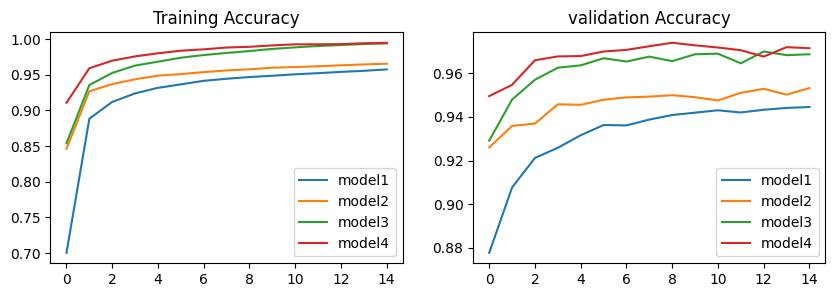

In [40]:
fig,axs=plt.subplots(nrows=1, ncols=2, figsize=(10,3))
axs[0].set_title("Training Accuracy")
axs[0].plot(hist_model1.history["accuracy"],label="model1")
axs[0].plot(hist_model2.history["accuracy"],label="model2")
axs[0].plot(hist_model3.history["accuracy"],label="model3")
axs[0].plot(hist_model4.history["accuracy"],label="model4")
axs[0].legend()

axs[1].plot(hist_model1.history["val_accuracy"],label="model1")
axs[1].plot(hist_model2.history["val_accuracy"],label="model2")
axs[1].plot(hist_model3.history["val_accuracy"],label="model3")
axs[1].plot(hist_model4.history["val_accuracy"],label="model4")
axs[1].legend()
axs[1].set_title("validation Accuracy")

# plt.tight_layout()
plt.show()
